<div style="border:solid purple 2px; padding: 20px"> 

Привет, Дарья! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указавать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

Мне понравился твой проект, есть пару замечаний, но их не много, я думаю ты быстро справишься. Жду твою работу на повторное ревью :)


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Спасибо за быструю доработку комментариев! Я просмотрел твои доработки, там все здорово и корректно, так что работу я принимаю. Надеюсь ты учтешь мои комментарии в последующих работах. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Широкоформатный Jupyter <a class="tocSkip"> </h3>

Расширяем границы, или как сделать работу более комфортной (не всем нравится 😄)

    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:90% !important; }</style>"))

### Загрузим и осмотрим данные

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
def show_info(data):
    print()
    display(data.head())
    print(data.info())

In [4]:
for i in [data_0, data_1, data_2]:
    show_info(i)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

В данном проекте мы работаем с данными одинаковой природы, а это значит, что большинство расчетов для регионов будут повторяться. Это отличная возможность потренироваться над оптимизацией кода. Например, вот здесь. Первичное знакомство с данными можно было реализовать в функции и вызывать эту функцию для каждого из датафреймов (в цикле в идеале)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Добавила функцию и цикл</font>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Я бы весь анализ засунул в функцию

Пропусков в данных нет, типы в порядке.

### Проверим данные на дубликаты

In [5]:
print(data_0.duplicated().sum())
print(data_0['id'].duplicated().sum())

0
10


<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Да, полных дубликатов нет, но я бы посмотрел по `id` все ли записи уникальные и относятся к разным скважинам, или есть какие-то артефакты...

In [6]:
print(data_1.duplicated().sum())
print(data_1['id'].duplicated().sum())

0
4


In [7]:
print(data_2.duplicated().sum())
print(data_2['id'].duplicated().sum())

0
4


Явных дубликатов нет.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Дубликаты по колонке id есть, но не думаю, что стоит их удалять, значения признаков ведь не повторяются</font>
</div>

### Удалим неинформативные столбцы

Столбцы с идентификаторами не несут для нас никакой полезной информации.

In [8]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Возможно стоило посмотреть еще на корреляции признаков, потому что мультиколлинеарность негативно влияет на качество моделей. А построение диаграмм рассеяния позволит выявить нелинейные связи

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

А еще, я бы построил графики распределений признаков - много полезной информации можно получить

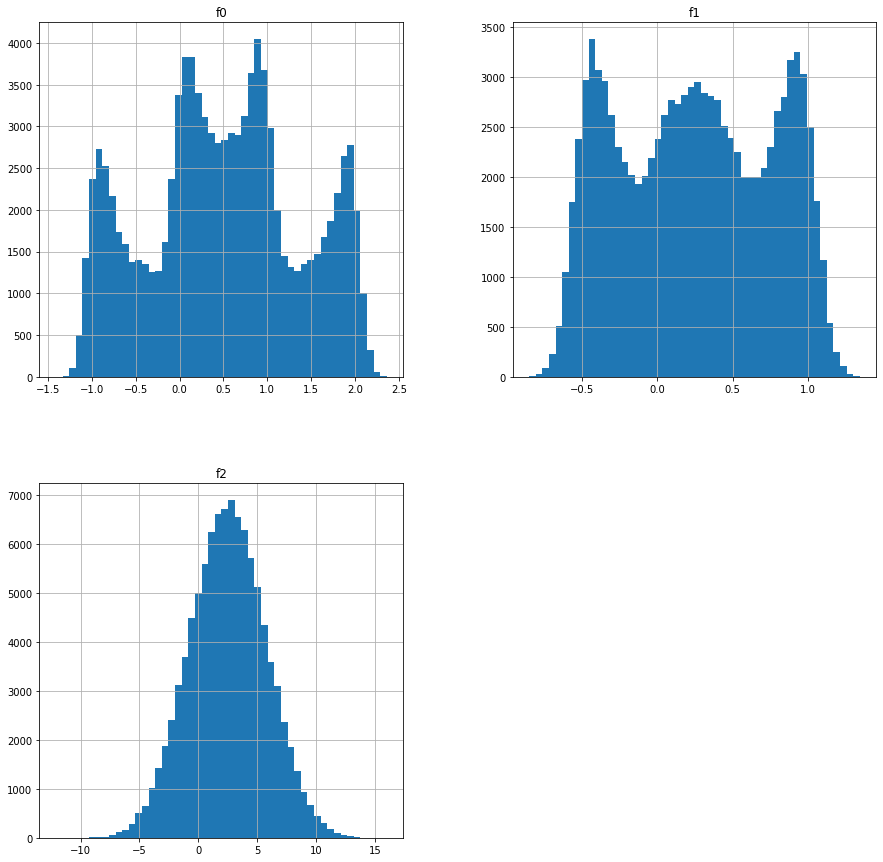

In [9]:
data_0[['f0','f1','f2']].hist(bins=50, figsize=(15, 15));

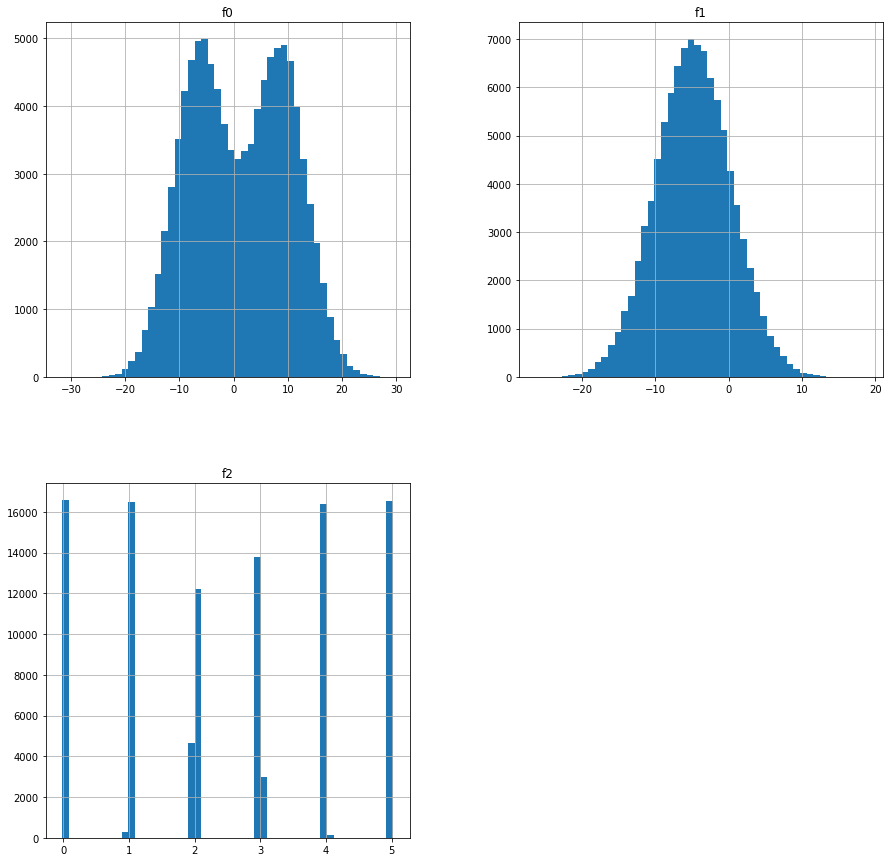

In [10]:
data_1[['f0','f1','f2']].hist(bins=50, figsize=(15, 15));

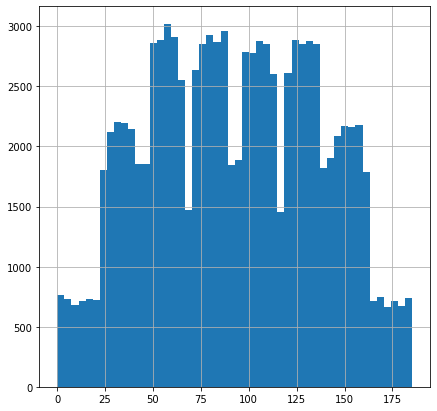

In [11]:
data_0['product'].hist(bins=50, figsize=(7, 7));

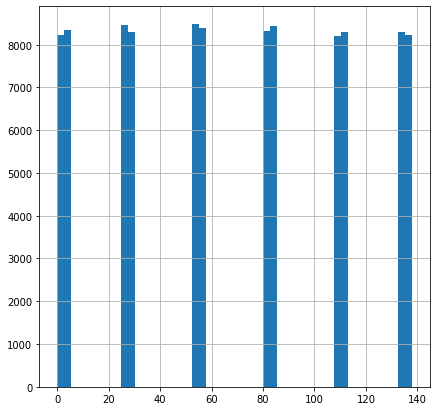

In [12]:
data_1['product'].hist(bins=50, figsize=(7, 7));

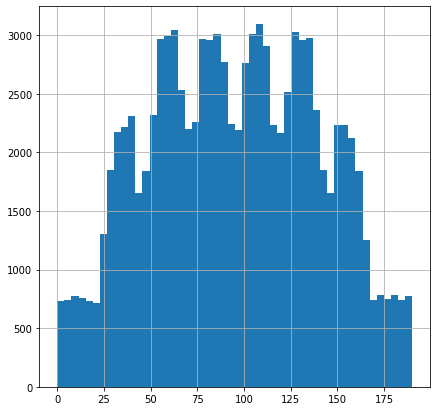

In [13]:
data_2['product'].hist(bins=50, figsize=(7, 7));

Для первого и третьего месторождения распределение похоже на нормальное, а во втором регионе данные имеют странное распределение: значения распределены равномерно с одинаковым шагом. Данные не подчиняются закону больших чисел и похоже, что были введены искуственно

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Добавила графики распределения по признакам</font>
</div>

## Обучение и проверка модели

### Разделим данные на обучающую и валидационную выборки

Разделим данные в соотношении 3:1

In [14]:
def split(data, target):
    features = data.drop([target], axis=1)
    target = data[target]
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345
    )
    print(features_train.shape[0])
    print(features_valid.shape[0])
    
    return features_train, features_valid, target_train, target_valid

In [15]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split(data_0, 'product')
features_train_1, features_valid_1, target_train_1, target_valid_1 = split(data_1, 'product')
features_train_2, features_valid_2, target_train_2, target_valid_2 = split(data_2, 'product')

75000
25000
75000
25000
75000
25000


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты фиксируешь `random_state`. Кстати, его можно задать один раз в начале проекта, например, используя любимый нами [numpy](https://www.delftstack.com/ru/howto/numpy/python-numpy-random-seed/)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Здесь тоже добавила функцию</font>
</div>

### Выполним предсказания для первой скважины

In [16]:
lr_0 = LinearRegression()
lr_0.fit(features_train_0, target_train_0)
predictions_valid_lr_0 = lr_0.predict(features_valid_0)
pred_valid_lr_0_mean = predictions_valid_lr_0.mean()
target_valid_lr_0_mean = target_valid_0.mean()
print(pred_valid_lr_0_mean)
print(target_valid_lr_0_mean)
print(mean_squared_error(target_valid_0, predictions_valid_lr_0)**0.5)

92.59256778438035
92.07859674082927
37.5794217150813


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Для линейных моделей важно, чтобы признаки имели схожий порядок. В нашем случае нам повезло, признаки не сильно отличаются дипазоном изменения значений. Но не стоит про это забывать. Вообще, полезно попробовать построить модели на разных данных, и с масштабированием и без, только так, пробуя разные варианты, можно найти лучший

- Средний предсказанный объем запасов в первой скважине: 92.59256778438035
- Средний фактический объем запасов в первой скважине: 92.07859674082927
- RMSE данной модели линейной регрессии на валидационной выборке: 37.5794217150813

### Выполним предсказания для второй скважины

In [17]:
lr_1 = LinearRegression()
lr_1.fit(features_train_1, target_train_1)
predictions_valid_lr_1 = lr_1.predict(features_valid_1)
pred_valid_lr_1_mean = predictions_valid_lr_1.mean()
target_valid_lr_1_mean = target_valid_1.mean()
print(pred_valid_lr_1_mean)
print(target_valid_lr_1_mean)
print(mean_squared_error(target_valid_1, predictions_valid_lr_1)**0.5)

68.728546895446
68.72313602435997
0.893099286775617


- Средний предсказанный объем запасов во второй скважине: 68.728546895446
- Средний фактический объем запасов во второй скважине: 68.72313602435997
- RMSE данной модели линейной регрессии на валидационной выборке: 0.893099286775617

### Выполним предсказания для третьей скважины

In [18]:
lr_2 = LinearRegression()
lr_2.fit(features_train_2, target_train_2)
predictions_valid_lr_2 = lr_2.predict(features_valid_2)
pred_valid_lr_2_mean = predictions_valid_lr_2.mean()
target_valid_lr_2_mean = target_valid_2.mean()
print(pred_valid_lr_2_mean)
print(target_valid_lr_2_mean)
print(mean_squared_error(target_valid_2, predictions_valid_lr_2)**0.5)

94.96504596800489
94.88423280885438
40.02970873393434


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

У метрики `MSE` есть встроенная возможность сразу считать rmse. Вот [здесь](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python) про это пишут

- Средний предсказанный объем запасов во второй скважине: 94.96504596800489
- Средний фактический объем запасов во второй скважине: 94.88423280885438
- RMSE данной модели линейной регрессии на валидационной выборке: 40.02970873393434

### Сохраним правильные ответы и предсказания для каждой скважины в три новых датафрейма.

In [19]:
data_dict_0 = {'real_product' : target_valid_0,
        'predicted_product' : predictions_valid_lr_0         
        }
data_predicted_0 = pd.DataFrame(data_dict_0, columns = ['real_product', 'predicted_product'])
display(data_predicted_0.head())

data_dict_1 = {'real_product' : target_valid_1,
        'predicted_product' : predictions_valid_lr_1         
        }
data_predicted_1 = pd.DataFrame(data_dict_1, columns = ['real_product', 'predicted_product'])
display(data_predicted_1.head())

data_dict_2 = {'real_product' : target_valid_2,
        'predicted_product' : predictions_valid_lr_2         
        }
data_predicted_2 = pd.DataFrame(data_dict_2, columns = ['real_product', 'predicted_product'])
display(data_predicted_2.head())

,real_product,predicted_product
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088


,real_product,predicted_product
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856


,real_product,predicted_product
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310


### Вывод

У второй скважины самая низкая RMSE: 0.893099286775617, но и средний объем запасов тоже самый маленький: 68.728546895446.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Такое различие в результатах мне кажется подозрительным. Явно со вторым регионом что-то не то. Я бы обязательно подсвятил это перед заказчиком

## Подготовка к расчёту прибыли

### Создадим константы для ключевых значений

In [20]:
BUDGET = 10000000000                        # общий бюджет
RESEARCHED_POINTS = 500                     # количество исследуемых точек
BEST_POINTS = 200                           # количество выбранных лучших точек
BARREL_PRICE = 450000                       # доход за тысячу баррелей

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

По правилам написания кода [PEP8](https://pep8.org/), константы определяют заглавными буквами)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправила</font>
</div>

### Посчитаем минимальное среднее количество продукта в месторождениях региона, достаточное для разработки

In [21]:
one_well_money = BUDGET / BEST_POINTS       # бюджет на одну точку
oil_volume = one_well_money / BARREL_PRICE  # минимальный средний объем нефти на одну точку
oil_volume

111.11111111111111

Минимальный средний объем нефти на одну точку равен 111.111 тысяч баррелей

Сравним с фактическим средним объемом нефти в скважинах

In [22]:
data_0['product'].mean() - oil_volume

-18.6111111111111

Для первого месторождения средний объем нефти меньше минимального среднего объема нефти, достаточного для разработки, на 19 тысяч баррелей.

In [23]:
data_1['product'].mean() - oil_volume

-42.2861111111111

Для второго месторождения средний объем нефти меньше минимального среднего объема нефти, достаточного для разработки, на 42 тысячи баррелей.

In [24]:
data_2['product'].mean() - oil_volume

-16.11111111111107

Для третьего месторождения средний объем нефти меньше минимального среднего объема нефти, достаточного для разработки, на 16 тысяч баррелей.

### Вывод

Во втором месторождении средний запас нефти самый маленький. Но это не значит, что на данном этапе нам следует от нее отказаться, будем проводить дальнейшие расчеты, чтобы не дейстовать наугад.

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Я бы сказал, что это может говорить о том, что мы не можем рандомно выбирать скважины для разработки, ведь в таком случае, нас, возможно, ждет неудача

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Согласна, поправила вывод</font>
</div>

## Напишем функцию расчета прибыли:

- Выберем скважины с максимальными значениями предсказаний. 
- Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитаем прибыль для полученного объёма сырья.

In [25]:
def calc_profit(target, predictions, count):
    probs_sorted = predictions.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return BARREL_PRICE * selected.sum() - BUDGET

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Функция написана корректно, сортируем по прогнозам, берем факт 👍

## Расчёт прибыли и рисков 

Напишем функцию для расчета средней прибыли, доверительного интервала и рисков с использованием процедуры Bootstrap.

In [26]:

def bootstrap(target, preds):
    state = np.random.RandomState(5)
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample( n=RESEARCHED_POINTS, replace=True, random_state=state)
        probs_sample = preds[target_sample.index]
        profit = calc_profit(target, probs_sample, BEST_POINTS)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Расчет рисков можно было выполнить проще, например, так 
    
```python
risk = (values < 0).mean()
```

Либо можно использовать [percentileofscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html) от `scipy`

### Проведем процедуру Bootstrap с данными о первом месторождении

Проведем процедуру Bootstrap к нашим данным для расчета предполагаемой прибыли, доверительного интервала и процента риска.

In [27]:
average_0, lower_0, upper_0, risk_0 = bootstrap(data_predicted_0['real_product'], data_predicted_0['predicted_product'])
print(average_0)
print(lower_0, '-', upper_0)
print(risk_0)

394311820.75167286
-140424170.30783188 - 910762290.5373243
0.082


- Средняя прибыль по первому региону = 394 311 820.75 тыс.руб.
- 95% доверительный интервал от -140 424 170.31 до 910 762 290.54 тыс.руб.
- Процент риска 8.2%

### Проведем процедуру Bootstrap с данными о втором месторождении

In [28]:
average_1, lower_1, upper_1, risk_1 = bootstrap(data_predicted_1['real_product'], data_predicted_1['predicted_product'])
print(average_1)
print(lower_1, '-', upper_1)
print(risk_1)

456707720.6092046
83880490.11369762 - 866604745.4654409
0.01


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Я бы еще добавил отрисовку гистограмм распределений. На графики можно  еще вынести вертикальные динии для средних и доверительного интервала. Я бы использовал для этого [axvline](https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot)

- Средняя прибыль по второму региону = 456 707 720.61 тыс.руб.
- 95% доверительный интервал от 83 880 490.11 до 866 604 745.47 тыс.руб.
- Процент риска 1.0%

### Проведем процедуру Bootstrap с данными о третьем месторождении

In [29]:
average_2, lower_2, upper_2, risk_2 = bootstrap(data_predicted_2['real_product'], data_predicted_2['predicted_product'])
print(average_2)
print(lower_2, '-', upper_2)
print(risk_2)

383961971.4634157
-123091563.1980833 - 921121965.1888549
0.072


- Средняя прибыль по второму региону = 383 961 971.46 тыс.руб.
- 95% доверительный интервал от -123 091 563.20 до 921 121 965.19 тыс.руб.
- Процент риска 7.2%

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Все отлично, но результаты отличаются от выводов. Советую `state = np.random.RandomState(5)` внести в функцию, тогда он будет каждый раз переопределяться и результаты будут одинаковыми

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправила, теперь результаты одинаковые</font>
</div>

### Вывод

Самый предпочтительный регион для разработки - второй, у него:
- Самая высокая предполагаемая прибыль -  456 707 720.61 тыс.руб. 
- Самые низкие риски - 1,0%
- Его доверительный интервал показывает, что даже при неудачном выборе точек разработка скважин окупится


<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Встроенные функции all() и any() <a class="tocSkip"> </h3>

Полезные функции, которые помогут узнать есть ли определенные значения в объекте.

`all` возвращает **True**, если все объекты равны **True** или удовлетворяют условию

![](https://i.ibb.co/NKs2yWq/image.png)

`any` в свою очередь делает то же самое, но возвращает **True**,если хотя бы один равен **True**

![](https://i.ibb.co/4tq8TmV/image.png)

## Общий вывод

<b>Проведена работа по подготовке данных: удалены неинформативные столбцы, данные проверены на дубликаты.</b>

<b>Модели обучены и получены предсказания для всех трех месторождений.</b>

Первое:
- Средний предсказанный объем запасов в первой скважине: 92.59256778438035
- Средний фактический объем запасов в первой скважине: 92.07859674082927
- RMSE данной модели линейной регрессии на валидационной выборке: 37.5794217150813

Второе:
- Средний предсказанный объем запасов во второй скважине: 68.728546895446
- Средний фактический объем запасов во второй скважине: 68.72313602435997
- RMSE данной модели линейной регрессии на валидационной выборке: 0.893099286775617

Третье:
- Средний предсказанный объем запасов во второй скважине: 94.96504596800489
- Средний фактический объем запасов во второй скважине: 94.88423280885438
- RMSE данной модели линейной регрессии на валидационной выборке: 40.02970873393434

<b>Рассчитаны прибыль, риски и доверительный интервал для всех трех месторождений.</b>

Первое:
- Средняя прибыль по первому региону = 394 311 820.75 тыс.руб.
- 95% доверительный интервал от -140 424 170.31 до 910 762 290.54 тыс.руб.
- Процент риска 8.2%

Второе:
- Средняя прибыль по второму региону = 456 707 720.61 тыс.руб.
- 95% доверительный интервал от 83 880 490.11 до 866 604 745.47 тыс.руб.
- Процент риска 1.0%

Третье:
- Средняя прибыль по второму региону = 383 961 971.46 тыс.руб.
- 95% доверительный интервал от -123 091 563.20 до 921 121 965.19 тыс.руб.
- Процент риска 7.2%

<b>Таким образом найден самый предпочтительный регион для разработки - второй, у него:</b>
- Самая высокая предполагаемая прибыль - 456 707 720.61 тыс.руб. 
- Самые низкие риски - 1,0%
- Его доверительный интервал показывает, что даже при неудачном выборе точек разработка скважин окупится

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован